# Import Library

In [44]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.applications import VGG16
from keras.applications import ResNet50
from keras.applications import MobileNetV2
from keras.applications import InceptionV3

# Display Sample Images from the Dataset

Found 924 images belonging to 8 classes.


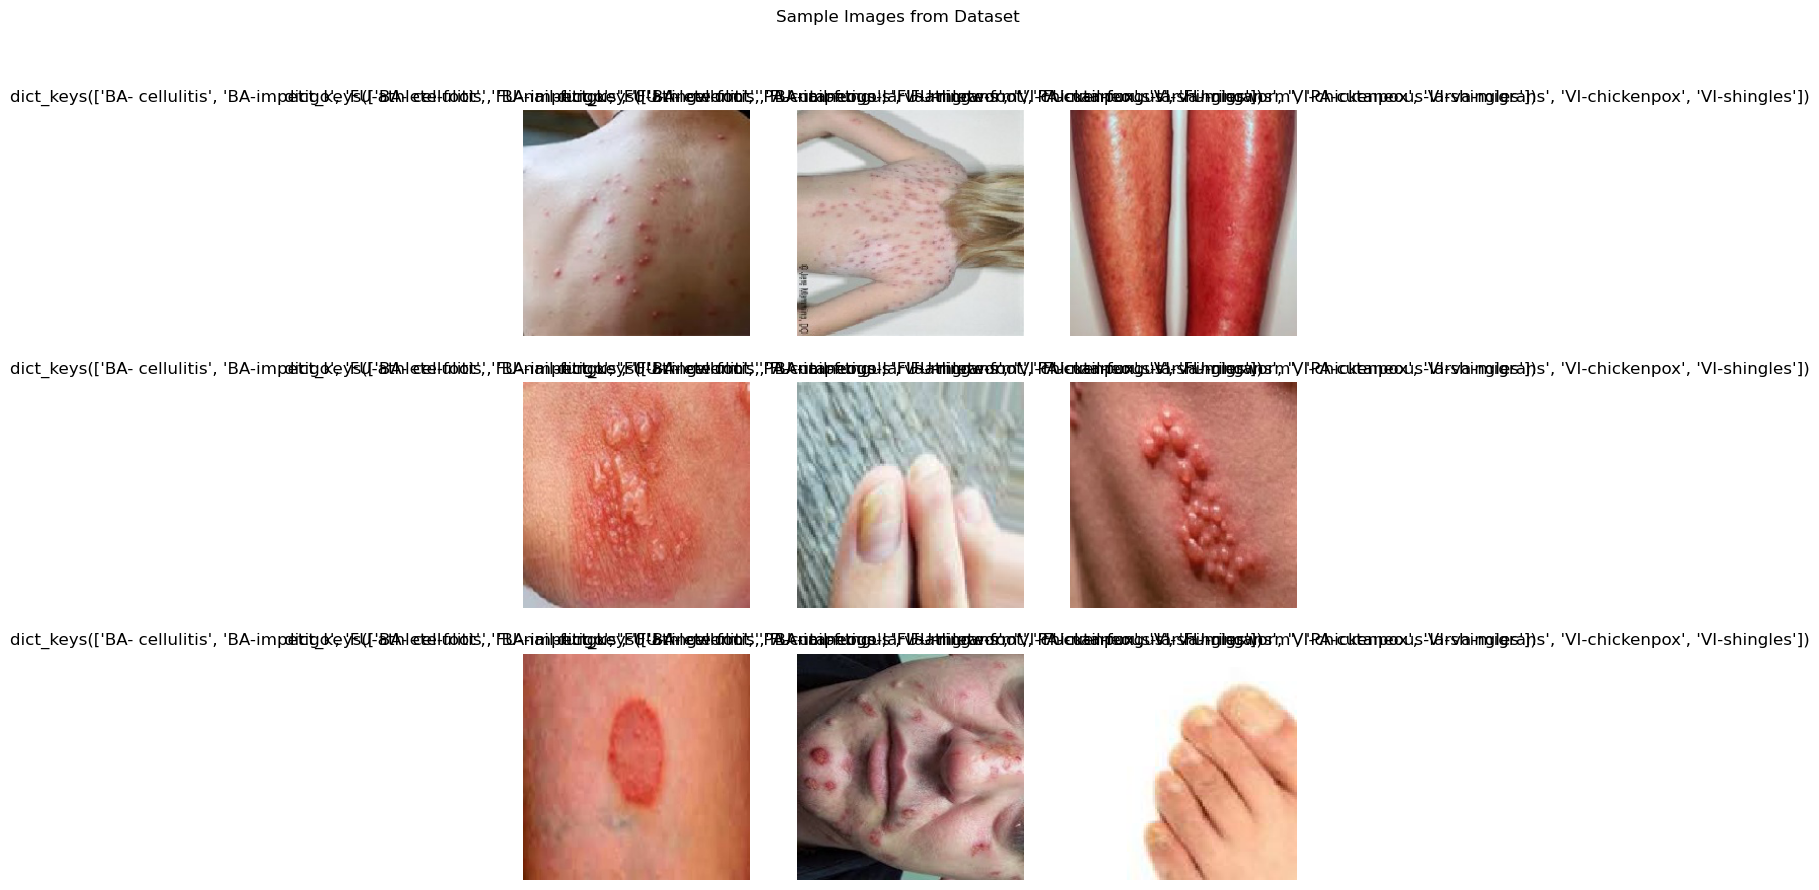

In [71]:
train_data_dir = r'C:\Users\soura\OneDrive\Desktop\skin-disease-datasaet\train_set'  

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=10, 
    class_mode='categorical',
    shuffle=True  
)
x_batch, y_batch = next(train_generator)
num_images = 9

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(train_generator.class_indices.keys())
    plt.axis('off')
plt.suptitle('Sample Images from Dataset')
plt.show()


# Show Class Distribution

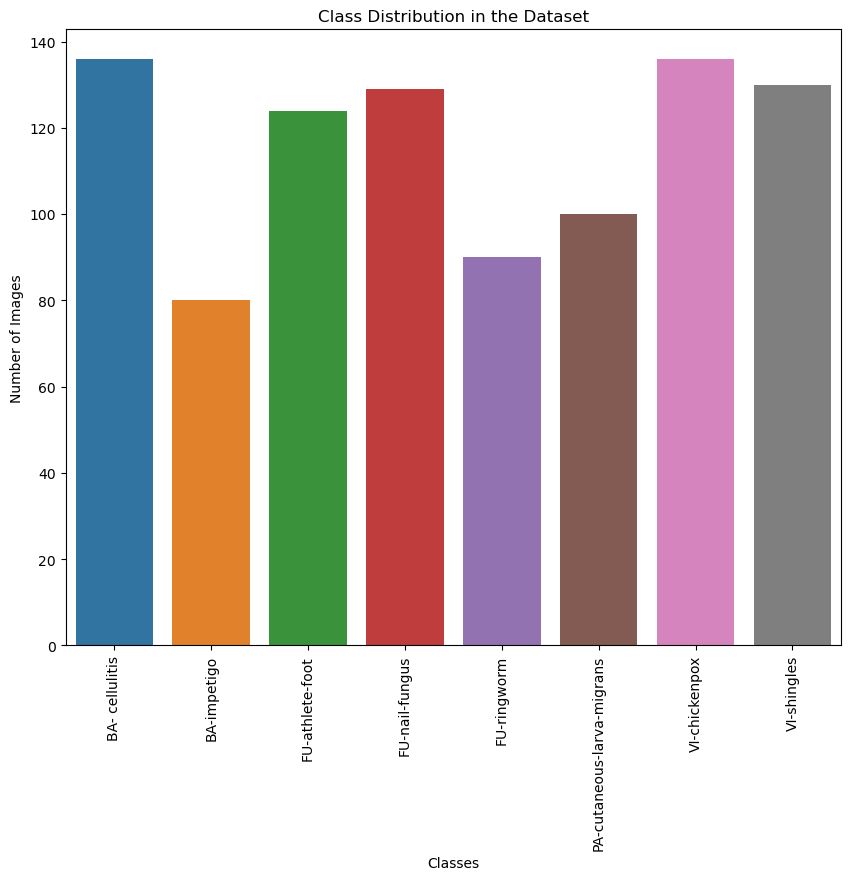

In [6]:
import os
import seaborn as sns

# Count the number of images per class
class_counts = {}
for class_dir in os.listdir(train_data_dir):
    class_counts[class_dir] = len(os.listdir(os.path.join(train_data_dir, class_dir)))

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)  # Rotate class names for better visibility
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Dataset')
plt.show()


# Visualize Image Augmentations

Found 924 images belonging to 8 classes.


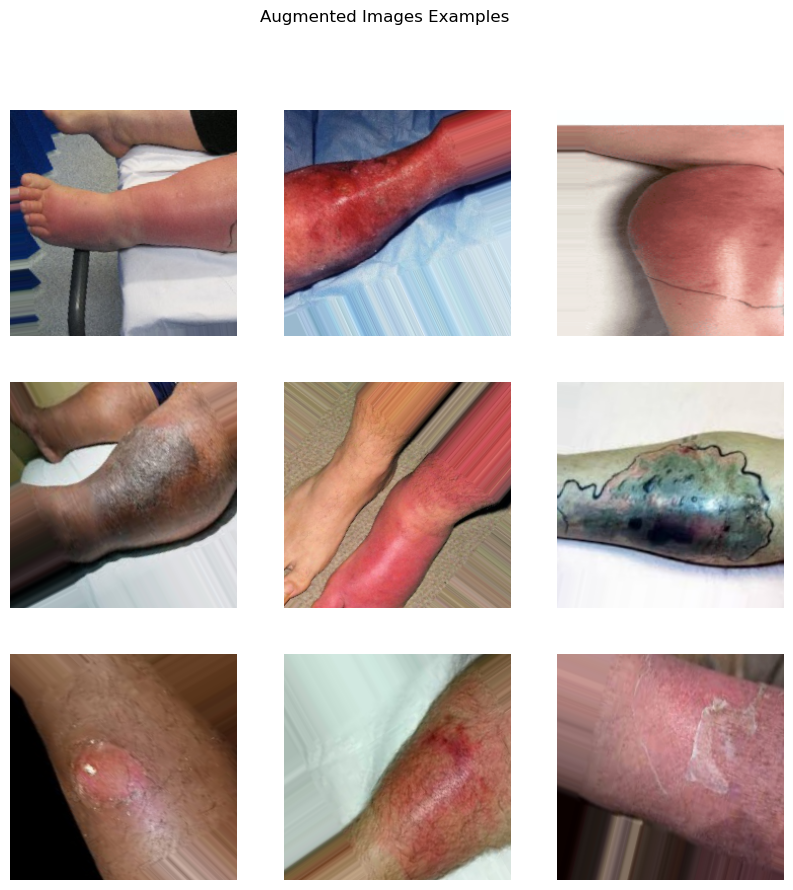

In [7]:
# Example of an augmented image generator
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator
augmented_generator = augmented_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Plot a few augmented images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    x_batch, y_batch = next(augmented_generator)
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[0])
    plt.axis('off')
plt.suptitle('Augmented Images Examples')
plt.show()


In [8]:
data_dir = r'C:\Users\soura\OneDrive\Desktop\skin-disease-datasaet\train_set'
batch_size = 32
img_height = 224
img_width = 224

In [9]:
# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 695 images belonging to 8 classes.
Found 229 images belonging to 8 classes.


# VGG 16 Model

In [10]:
# Define a function to create the model (VGG16)
def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Create and train the VGG16 model
vgg16_model = create_model()
vgg16_history = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10


C:\Users\soura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 - 49s - 2s/step - accuracy: 0.3353 - loss: 1.8163 - val_accuracy: 0.5066 - val_loss: 1.4948
Epoch 2/10
22/22 - 48s - 2s/step - accuracy: 0.6072 - loss: 1.2392 - val_accuracy: 0.5983 - val_loss: 1.2000
Epoch 3/10
22/22 - 47s - 2s/step - accuracy: 0.7137 - loss: 0.9753 - val_accuracy: 0.7074 - val_loss: 0.9632
Epoch 4/10
22/22 - 47s - 2s/step - accuracy: 0.7568 - loss: 0.8149 - val_accuracy: 0.6987 - val_loss: 0.8595
Epoch 5/10
22/22 - 47s - 2s/step - accuracy: 0.7871 - loss: 0.6992 - val_accuracy: 0.7948 - val_loss: 0.7319
Epoch 6/10
22/22 - 47s - 2s/step - accuracy: 0.8317 - loss: 0.6001 - val_accuracy: 0.7424 - val_loss: 0.7491
Epoch 7/10
22/22 - 47s - 2s/step - accuracy: 0.8245 - loss: 0.5416 - val_accuracy: 0.7904 - val_loss: 0.6944
Epoch 8/10
22/22 - 47s - 2s/step - accuracy: 0.8619 - loss: 0.4894 - val_accuracy: 0.8079 - val_loss: 0.6678
Epoch 9/10
22/22 - 47s - 2s/step - accuracy: 0.8849 - loss: 0.4393 - val_accuracy: 0.8079 - val_loss: 0.5690
Epoch 10/10
22/22 - 47s - 2s/s

In [12]:
# Save the VGG16 model
vgg16_model.save('VGG16_model.h5')

In [19]:
loaded_model = load_model('VGG16_model.h5')

In [21]:
test_data_dir = r'C:\Users\soura\OneDrive\Desktop\skin-disease-datasaet\test_set'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)


Found 233 images belonging to 8 classes.


In [22]:
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(report)

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8618 - loss: 0.5500
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Test Loss: 0.5856059789657593
Test Accuracy: 0.8412017226219177
Classification Report:
                            precision    recall  f1-score   support

            BA- cellulitis       0.85      0.88      0.87        33
               BA-impetigo       0.67      1.00      0.80        20
           FU-athlete-foot       0.86      0.78      0.82        32
            FU-nail-fungus       0.94      0.94      0.94        33
               FU-ringworm       0.86      0.78      0.82        23
PA-cutaneous-larva-migrans       0.62      0.52      0.57        25
             VI-chickenpox       1.00      0.97      0.99        34
               VI-shingles       0.84      0.82      0.83        33

                  accuracy                           0.84       233
                 macro avg       0.83      0.84      0.83       233
              weighted avg       0.85      0.84      0.

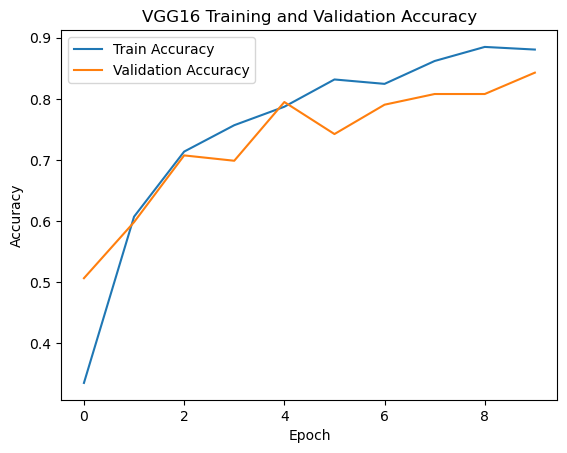

In [23]:
# Plot training and validation accuracy for VGG16
plt.plot(vgg16_history.history['accuracy'], label='Train Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# ResNet50 Model 

In [28]:
# Create and train the ResNet50 model
def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet_model = create_resnet_model()
resnet_history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2
)


Epoch 1/10
22/22 - 30s - 1s/step - accuracy: 0.1223 - loss: 2.3655 - val_accuracy: 0.1572 - val_loss: 2.1686
Epoch 2/10
22/22 - 25s - 1s/step - accuracy: 0.1424 - loss: 2.1765 - val_accuracy: 0.2009 - val_loss: 2.0208
Epoch 3/10
22/22 - 25s - 1s/step - accuracy: 0.1770 - loss: 2.0647 - val_accuracy: 0.2227 - val_loss: 1.9933
Epoch 4/10
22/22 - 26s - 1s/step - accuracy: 0.2115 - loss: 1.9985 - val_accuracy: 0.1528 - val_loss: 2.0219
Epoch 5/10
22/22 - 26s - 1s/step - accuracy: 0.2129 - loss: 2.0074 - val_accuracy: 0.2140 - val_loss: 2.0127
Epoch 6/10
22/22 - 24s - 1s/step - accuracy: 0.2288 - loss: 1.9571 - val_accuracy: 0.2052 - val_loss: 1.9561
Epoch 7/10
22/22 - 24s - 1s/step - accuracy: 0.2403 - loss: 1.8789 - val_accuracy: 0.1616 - val_loss: 1.9519
Epoch 8/10
22/22 - 24s - 1s/step - accuracy: 0.2403 - loss: 1.9139 - val_accuracy: 0.2576 - val_loss: 1.8825
Epoch 9/10
22/22 - 25s - 1s/step - accuracy: 0.2748 - loss: 1.9261 - val_accuracy: 0.2445 - val_loss: 1.9012
Epoch 10/10
22/22 -

In [29]:
# Save the ResNet50 model
resnet_model.save('ResNet50_model.h5')

In [30]:
# Load the saved model
loaded_model = load_model('ResNet50_model.h5')

In [31]:
# Prepare test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions for calculating metrics
)

Found 233 images belonging to 8 classes.


In [32]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Make predictions
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate metrics
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(report)

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 731ms/step - accuracy: 0.2174 - loss: 1.9465
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 857ms/step
Test Loss: 1.8600519895553589
Test Accuracy: 0.274678111076355
Classification Report:
                            precision    recall  f1-score   support

            BA- cellulitis       0.00      0.00      0.00        33
               BA-impetigo       0.00      0.00      0.00        20
           FU-athlete-foot       0.35      0.72      0.47        32
            FU-nail-fungus       0.20      0.27      0.23        33
               FU-ringworm       0.00      0.00      0.00        23
PA-cutaneous-larva-migrans       0.00      0.00      0.00        25
             VI-chickenpox       0.25      0.88      0.39        34
               VI-shingles       1.00      0.06      0.11        33

                  accuracy                           0.27       233
                 macro avg       0.23      0.24      0.15       233
              weighted avg       0.25      0.27     

C:\Users\soura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


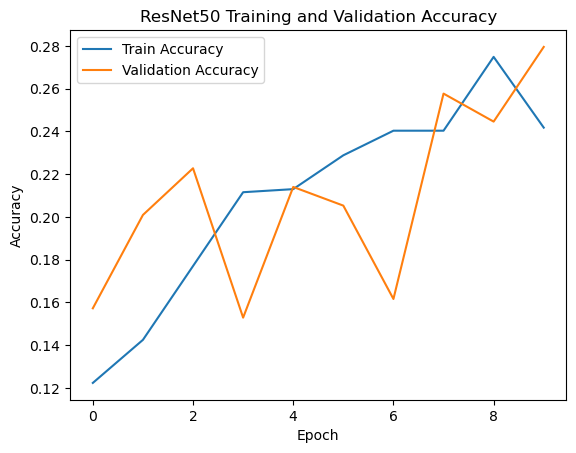

In [67]:
plt.plot(resnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# MobileNetV2 Model

In [37]:
# Create and train the MobileNetV2 model
def create_mobilenet_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenet_model = create_mobilenet_model()
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2
)


Epoch 1/10
22/22 - 12s - 523ms/step - accuracy: 0.7266 - loss: 0.9411 - val_accuracy: 0.9083 - val_loss: 0.3566
Epoch 2/10
22/22 - 8s - 360ms/step - accuracy: 0.9683 - loss: 0.1142 - val_accuracy: 0.9170 - val_loss: 0.2417
Epoch 3/10
22/22 - 8s - 373ms/step - accuracy: 0.9942 - loss: 0.0410 - val_accuracy: 0.9258 - val_loss: 0.2192
Epoch 4/10
22/22 - 8s - 367ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.9476 - val_loss: 0.1657
Epoch 5/10
22/22 - 8s - 367ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9476 - val_loss: 0.1603
Epoch 6/10
22/22 - 8s - 359ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9563 - val_loss: 0.1571
Epoch 7/10
22/22 - 8s - 353ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9520 - val_loss: 0.1570
Epoch 8/10
22/22 - 8s - 350ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9520 - val_loss: 0.1588
Epoch 9/10
22/22 - 8s - 351ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9563 - val_loss: 0.1589


In [38]:
# Save the MobileNetV2 model
mobilenet_model.save('MobileNetV2_model.h5')

In [39]:
# Load the saved model
loaded_model = load_model('MobileNetV2_model.h5')

In [40]:
# Prepare test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions for calculating metrics
)


Found 233 images belonging to 8 classes.


In [41]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Make predictions
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate metrics
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(report)

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.9397 - loss: 0.1540


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step
Test Loss: 0.15920010209083557
Test Accuracy: 0.9313304424285889
Classification Report:
                            precision    recall  f1-score   support

            BA- cellulitis       0.94      0.97      0.96        33
               BA-impetigo       0.91      1.00      0.95        20
           FU-athlete-foot       0.93      0.88      0.90        32
            FU-nail-fungus       0.97      0.97      0.97        33
               FU-ringworm       1.00      0.74      0.85        23
PA-cutaneous-larva-migrans       0.91      0.84      0.87        25
             VI-chickenpox       1.00      1.00      1.00        34
               VI-shingles       0.82      1.00      0.90        33

                  accuracy                           0.93       233
                 macro avg       0.94      0.92      0.93       233
              weighted avg       0.94      0.93      0.93       233



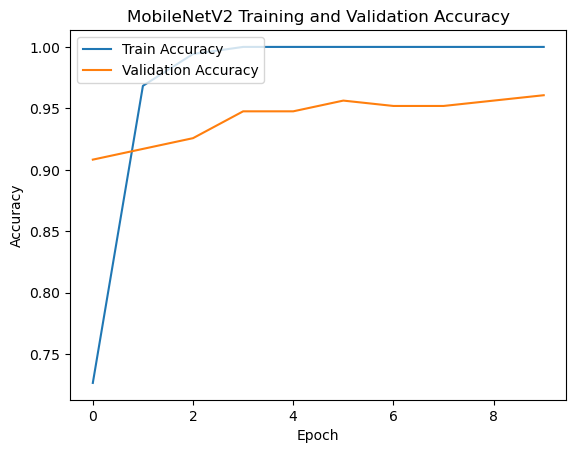

In [42]:
# Plot training and validation accuracy for MobileNetV2
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# InceptionV3 Model

In [45]:
# Create and train the InceptionV3 model
def create_inception_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(train_generator.num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

inception_model = create_inception_model()
inception_history = inception_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=2
)

Epoch 1/10
22/22 - 19s - 869ms/step - accuracy: 0.5281 - loss: 2.0669 - val_accuracy: 0.8122 - val_loss: 0.5615
Epoch 2/10
22/22 - 13s - 611ms/step - accuracy: 0.8806 - loss: 0.3739 - val_accuracy: 0.8865 - val_loss: 0.3656
Epoch 3/10
22/22 - 13s - 590ms/step - accuracy: 0.9597 - loss: 0.1632 - val_accuracy: 0.8908 - val_loss: 0.3341
Epoch 4/10
22/22 - 12s - 567ms/step - accuracy: 0.9813 - loss: 0.0857 - val_accuracy: 0.9258 - val_loss: 0.2280
Epoch 5/10
22/22 - 12s - 564ms/step - accuracy: 0.9986 - loss: 0.0466 - val_accuracy: 0.9432 - val_loss: 0.1795
Epoch 6/10
22/22 - 12s - 563ms/step - accuracy: 0.9986 - loss: 0.0263 - val_accuracy: 0.9301 - val_loss: 0.1702
Epoch 7/10
22/22 - 12s - 564ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.9476 - val_loss: 0.1650
Epoch 8/10
22/22 - 12s - 564ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.9520 - val_loss: 0.1524
Epoch 9/10
22/22 - 13s - 580ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.9432 - val_loss:

In [46]:
# Save the InceptionV3 model
inception_model.save('InceptionV3_model.h5')

In [47]:
# Load the saved model
loaded_model = load_model('InceptionV3_model.h5')

In [48]:
# Prepare test data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions for calculating metrics
)


Found 233 images belonging to 8 classes.


In [49]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Make predictions
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate metrics
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(report)

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.9364 - loss: 0.2775


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step
Test Loss: 0.28221452236175537
Test Accuracy: 0.9227467775344849
Classification Report:
                            precision    recall  f1-score   support

            BA- cellulitis       0.91      0.97      0.94        33
               BA-impetigo       1.00      1.00      1.00        20
           FU-athlete-foot       0.88      0.88      0.88        32
            FU-nail-fungus       0.97      0.97      0.97        33
               FU-ringworm       0.85      0.74      0.79        23
PA-cutaneous-larva-migrans       0.88      0.84      0.86        25
             VI-chickenpox       1.00      0.97      0.99        34
               VI-shingles       0.89      0.97      0.93        33

                  accuracy                           0.92       233
                 macro avg       0.92      0.92      0.92       233
              weighted avg       0.92      0.92      0.92       233



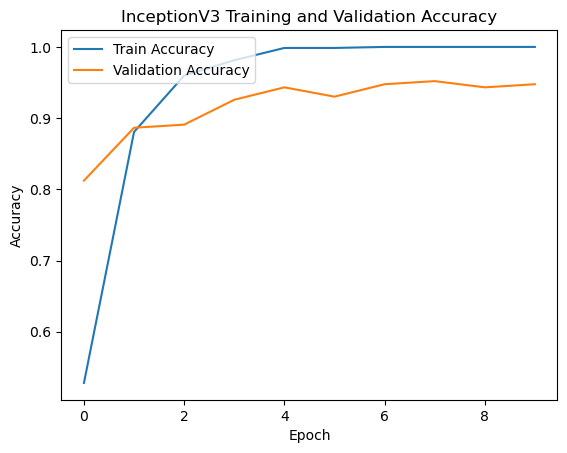

In [50]:
# Plot training and validation accuracy for InceptionV3
plt.plot(inception_history.history['accuracy'], label='Train Accuracy')
plt.plot(inception_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('InceptionV3 Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Showing Every Model Accuracy

In [51]:
# Initialize a dictionary to store accuracies for easy comparison
model_accuracies = {}

model_accuracies['VGG16'] = {
    'train_accuracy': vgg16_history.history['accuracy'][-1],
    'validation_accuracy': vgg16_history.history['val_accuracy'][-1]
}

model_accuracies['ResNet50'] = {
    'train_accuracy': resnet_history.history['accuracy'][-1],
    'validation_accuracy': resnet_history.history['val_accuracy'][-1]
}

model_accuracies['MobileNetV2'] = {
    'train_accuracy': mobilenet_history.history['accuracy'][-1],
    'validation_accuracy': mobilenet_history.history['val_accuracy'][-1]
}

model_accuracies['InceptionV3'] = {
    'train_accuracy': inception_history.history['accuracy'][-1],
    'validation_accuracy': inception_history.history['val_accuracy'][-1]
}

# At the end of the notebook, print all accuracies:
print("Final Training and Validation Accuracies for All Models:")
for model, accuracies in model_accuracies.items():
    print(f"{model} - Training Accuracy: {accuracies['train_accuracy']:.2f}, Validation Accuracy: {accuracies['validation_accuracy']:.2f}")


Final Training and Validation Accuracies for All Models:
VGG16 - Training Accuracy: 0.88, Validation Accuracy: 0.84
ResNet50 - Training Accuracy: 0.24, Validation Accuracy: 0.28
MobileNetV2 - Training Accuracy: 1.00, Validation Accuracy: 0.96
InceptionV3 - Training Accuracy: 1.00, Validation Accuracy: 0.95


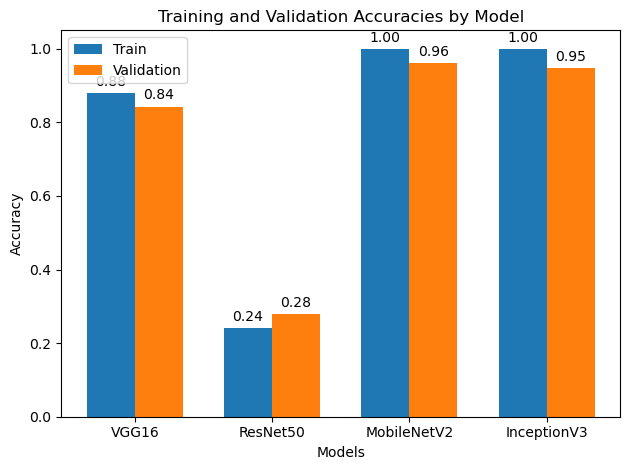

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the model_accuracies dictionary
models = ['VGG16', 'ResNet50', 'MobileNetV2', 'InceptionV3']
train_accuracies = [
    model_accuracies['VGG16']['train_accuracy'],
    model_accuracies['ResNet50']['train_accuracy'],
    model_accuracies['MobileNetV2']['train_accuracy'],
    model_accuracies['InceptionV3']['train_accuracy']
]
validation_accuracies = [
    model_accuracies['VGG16']['validation_accuracy'],
    model_accuracies['ResNet50']['validation_accuracy'],
    model_accuracies['MobileNetV2']['validation_accuracy'],
    model_accuracies['InceptionV3']['validation_accuracy']
]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train')
rects2 = ax.bar(x + width/2, validation_accuracies, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracies by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# Check the Model 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
InceptionV3 Model Prediction: VI-shingles
MobileNetV2 Model Prediction: VI-shingles
ResNet50 Model Prediction: VI-chickenpox
VGG16 Model Prediction: VI-shingles


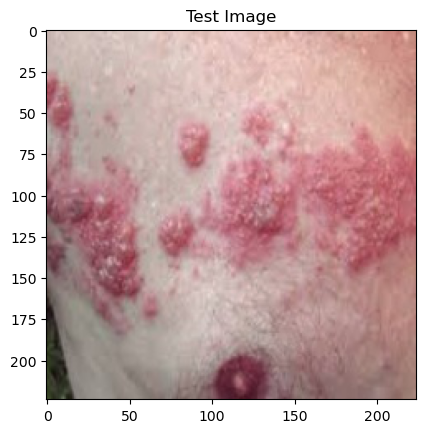

In [70]:
test_image_path = r'C:\Users\soura\OneDrive\Desktop\skin-disease-datasaet\test_set\VI-shingles\70_VI-shingles (29).jpg'

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded / 255.0

test_image = load_and_preprocess_image(test_image_path)

models_info = {
    'InceptionV3_model.h5': 'InceptionV3 Model',
    'MobileNetV2_model.h5': 'MobileNetV2 Model',
    'ResNet50_model.h5': 'ResNet50 Model',
    'VGG16_model.h5': 'VGG16 Model'
}

output_results = []


for model_file, model_name in models_info.items():
    model = load_model(model_file)
    predictions = model.predict(test_image)
    predicted_class_index = np.argmax(predictions, axis=1)

    labels = (train_generator.class_indices)  
    labels = dict((v, k) for k, v in labels.items())
    predicted_label = labels[predicted_class_index[0]]

  
    output_results.append((model_name, predicted_label))


for model_name, predicted_label in output_results:
    print(f"{model_name} Prediction: {predicted_label}")

# Optional: Display the image
img_to_show = image.load_img(test_image_path)
plt.imshow(img_to_show)
plt.title("Test Image")
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


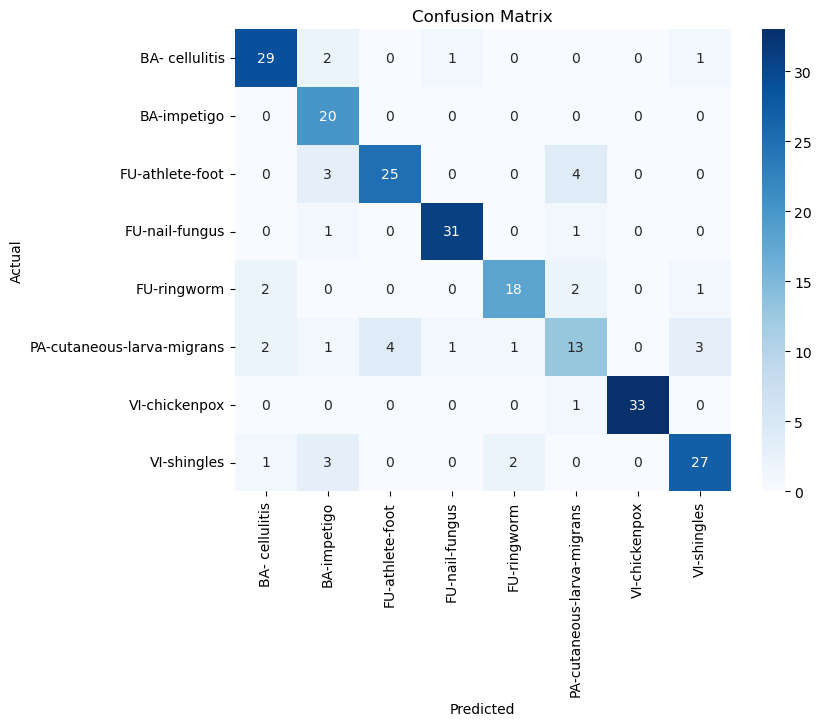

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step


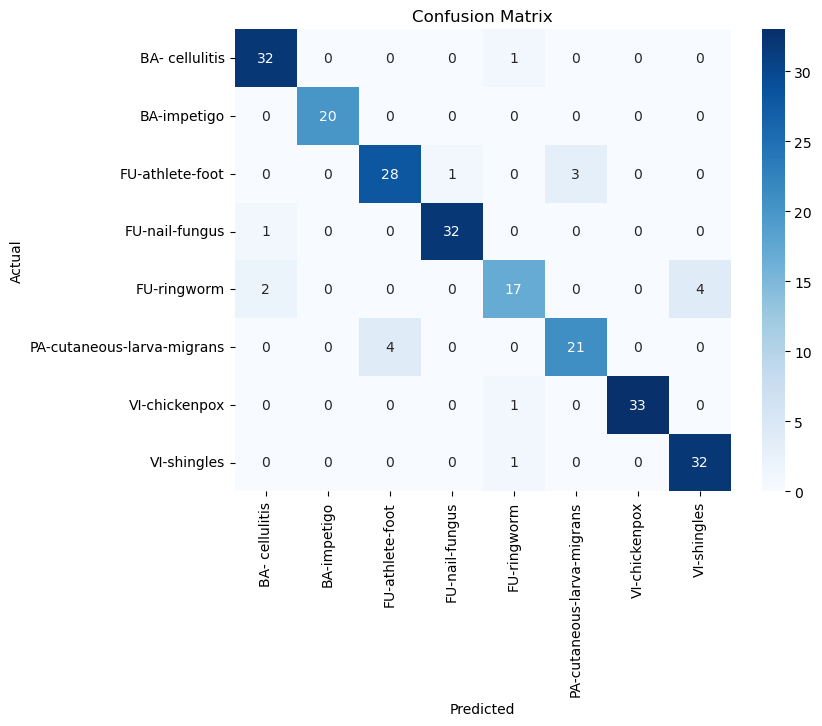

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step


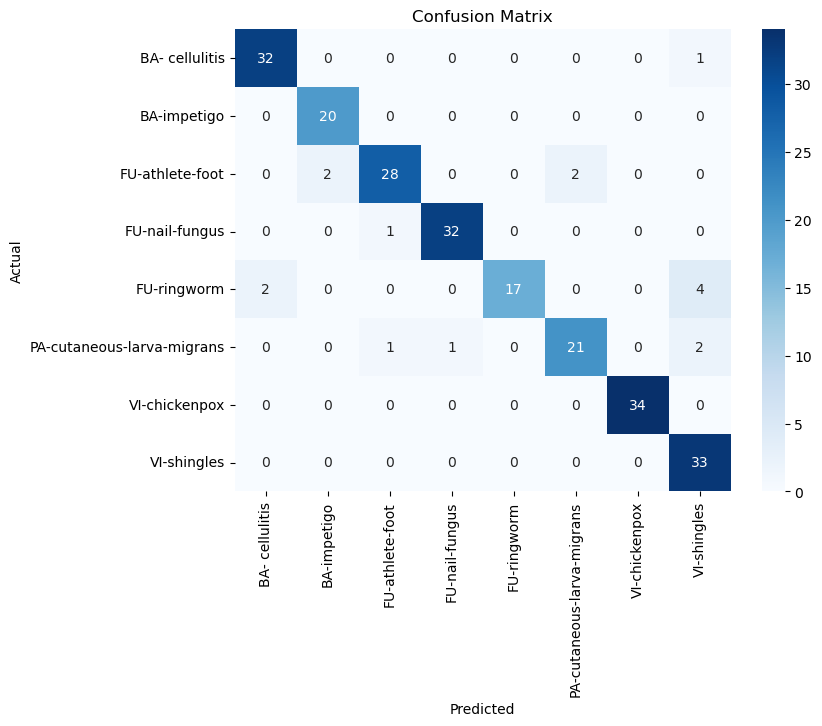

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step


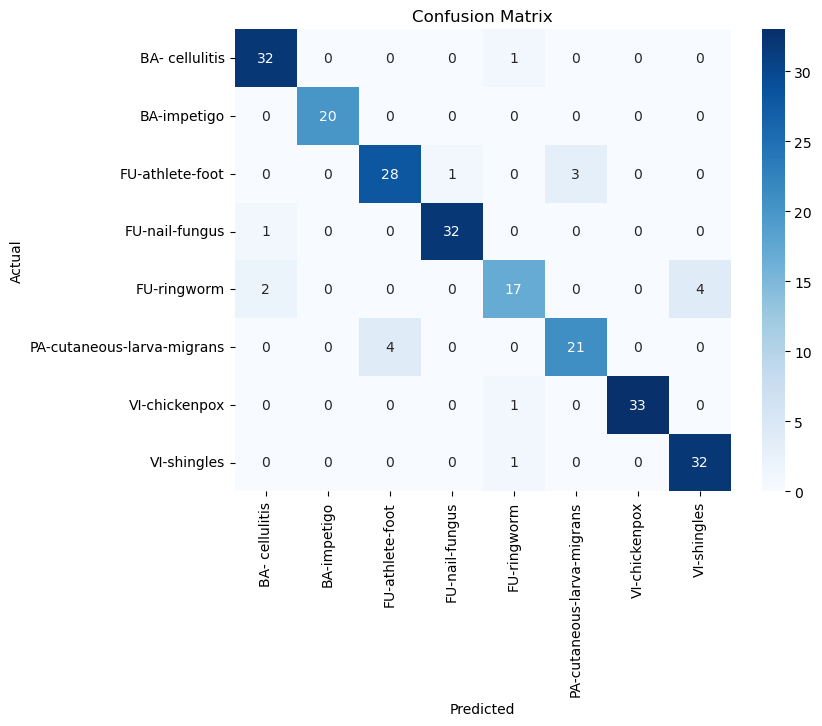

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for VGG16 model
y_pred_vgg16 = vgg16_model.predict(test_generator)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
plot_confusion_matrix(test_generator.classes, y_pred_classes_vgg16, class_names=test_generator.class_indices.keys())

# Plot confusion matrix for ResNet50 model
y_pred_resnet = loaded_model.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
plot_confusion_matrix(test_generator.classes, y_pred_classes_resnet, class_names=test_generator.class_indices.keys())

# Plot confusion matrix for MobileNetV2 model
y_pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
plot_confusion_matrix(test_generator.classes, y_pred_classes_mobilenet, class_names=test_generator.class_indices.keys())

# Plot confusion matrix for InceptionV3 model
y_pred_inception = loaded_model.predict(test_generator)
y_pred_classes_inception = np.argmax(y_pred_inception, axis=1)
plot_confusion_matrix(test_generator.classes, y_pred_classes_inception, class_names=test_generator.class_indices.keys())
